<a href="https://colab.research.google.com/github/JosephW23/Portfolio-Optimization/blob/main/Milestone2_CSE151A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/macrosynergy/fixed-income-returns-and-macro-trends


In [ ]:
import numpy as np

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("JPMaQS_Quantamental_Indicators.csv")

In [ ]:
df = df.drop(columns = ["Unnamed: 0"])

In [ ]:
df['real_date'] = pd.to_datetime(df['real_date'])

In [ ]:
df.dtypes

real_date    datetime64[ns]
cid                  object
xcat                 object
value               float64
grading             float64
eop_lag             float64
mop_lag             float64
dtype: object

In [17]:
print(df.head())
print(df.info())

   real_date  cid              xcat     value  grading  eop_lag  mop_lag
0 2000-01-03  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     95.0    292.0
1 2000-01-04  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     96.0    293.0
2 2000-01-05  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     97.0    294.0
3 2000-01-06  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     98.0    295.0
4 2000-01-07  AUD  CPIC_SA_P1M1ML12  1.244168      2.0     99.0    296.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390059 entries, 0 to 3390058
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   real_date  datetime64[ns]
 1   cid        object        
 2   xcat       object        
 3   value      float64       
 4   grading    float64       
 5   eop_lag    float64       
 6   mop_lag    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 181.0+ MB
None


array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'grading'}>],
       [<Axes: title={'center': 'eop_lag'}>,
        <Axes: title={'center': 'mop_lag'}>]], dtype=object)

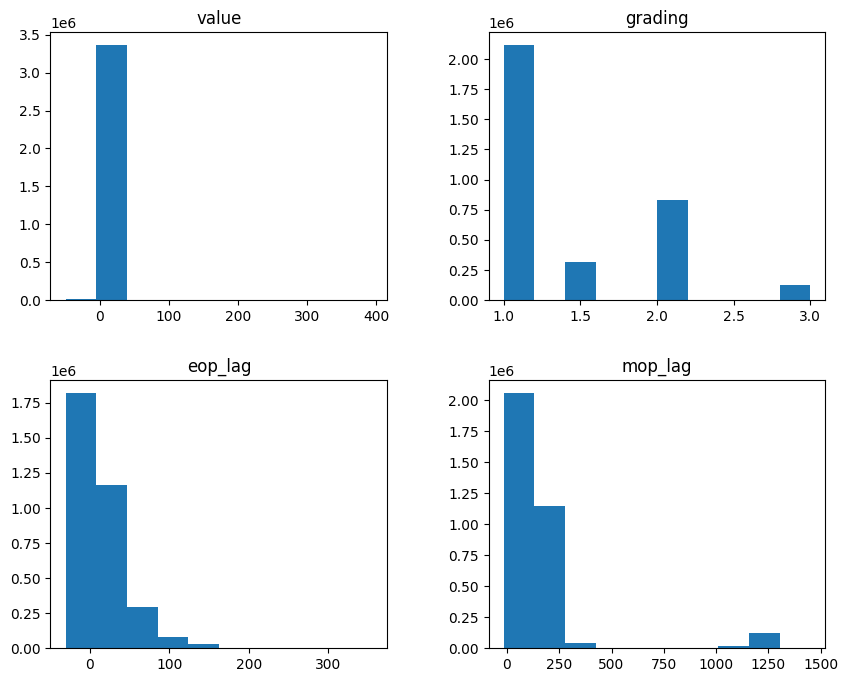

In [37]:
#Checking distribution for numerical columns
numerical_columns = ['value', 'grading', 'eop_lag', 'mop_lag']
df[numerical_columns].hist(figsize=(10, 8), bins = 10, grid = False)
